In [1]:
#!/usr/bin/env python

# ---------------------------------------------------------
# IOU Tracker
# Copyright (c) 2017 TU Berlin, Communication Systems Group
# Licensed under The MIT License [see LICENSE for details]
# Written by Erik Bochinski
# ---------------------------------------------------------


In [2]:
from time import time
import argparse

from lib.iou_tracker import track_iou
from lib.utils import load_mot, save_to_csv

In [3]:
args = { "detection_path": "../dataset/MOT17-02-DPM/det/det.txt",
         "sigma_l": - 0.2 ,
         "sigma_h": 0.2,
         "sigma_iou": 0.3,
         "t_min": 1,
         "output_path": "../dataset/result/MOT17-02-DPM.txt"}

In [4]:
detections = load_mot(args["detection_path"])

start = time()
tracks = track_iou(detections, args["sigma_l"], args["sigma_h"], args["sigma_iou"], args["t_min"])
end = time()

num_frames = len(detections)
print("finished at " + str(int(num_frames / (end - start))) + " fps!")

save_to_csv(args["output_path"], tracks)

finished at 2670 fps!


In [5]:
from os import path
from glob import glob
from collections import defaultdict

In [6]:
data_path = '../dataset/'
image_path = '../dataset/MOT17-02-DPM/'
total_frame = 600

In [7]:
dt_seqs = defaultdict(dict)
with open(path.join(data_path, 'MOT17-02-DPM/det', 'det.txt')) as f:
    for seq, obj, *data in [line.strip().split(',') for line in f.readlines()]:
        dt_seqs[int(seq)][int(obj)] = data

In [8]:
gt_seqs = defaultdict(dict)
with open(path.join(data_path, 'MOT17-02-DPM/gt', 'gt.txt')) as f:
    for seq, obj, *data in [line.strip().split(',') for line in f.readlines()]:
        gt_seqs[int(seq)][int(obj)] = data

In [9]:
result_seqs = defaultdict(dict)
with open(path.join(data_path, 'result', 'MOT17-02-DPM.txt')) as f:
    for seq, obj, *data in [line.strip().split(',') for line in f.readlines()]:
        result_seqs[int(seq)][int(obj)] = data

In [10]:
import matplotlib.pyplot as plt

In [11]:
x = range(1, total_frame+1)
y = [len(result_seqs[f]) / len(gt_seqs[f]) for f in x]

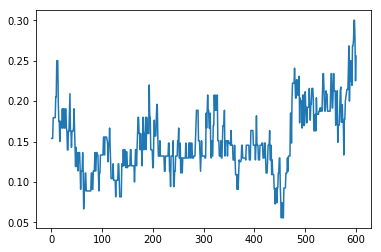

In [12]:
plt.plot(x, y)
plt.show()

In [13]:
from PIL import Image, ImageDraw
from IPython.display import display

39


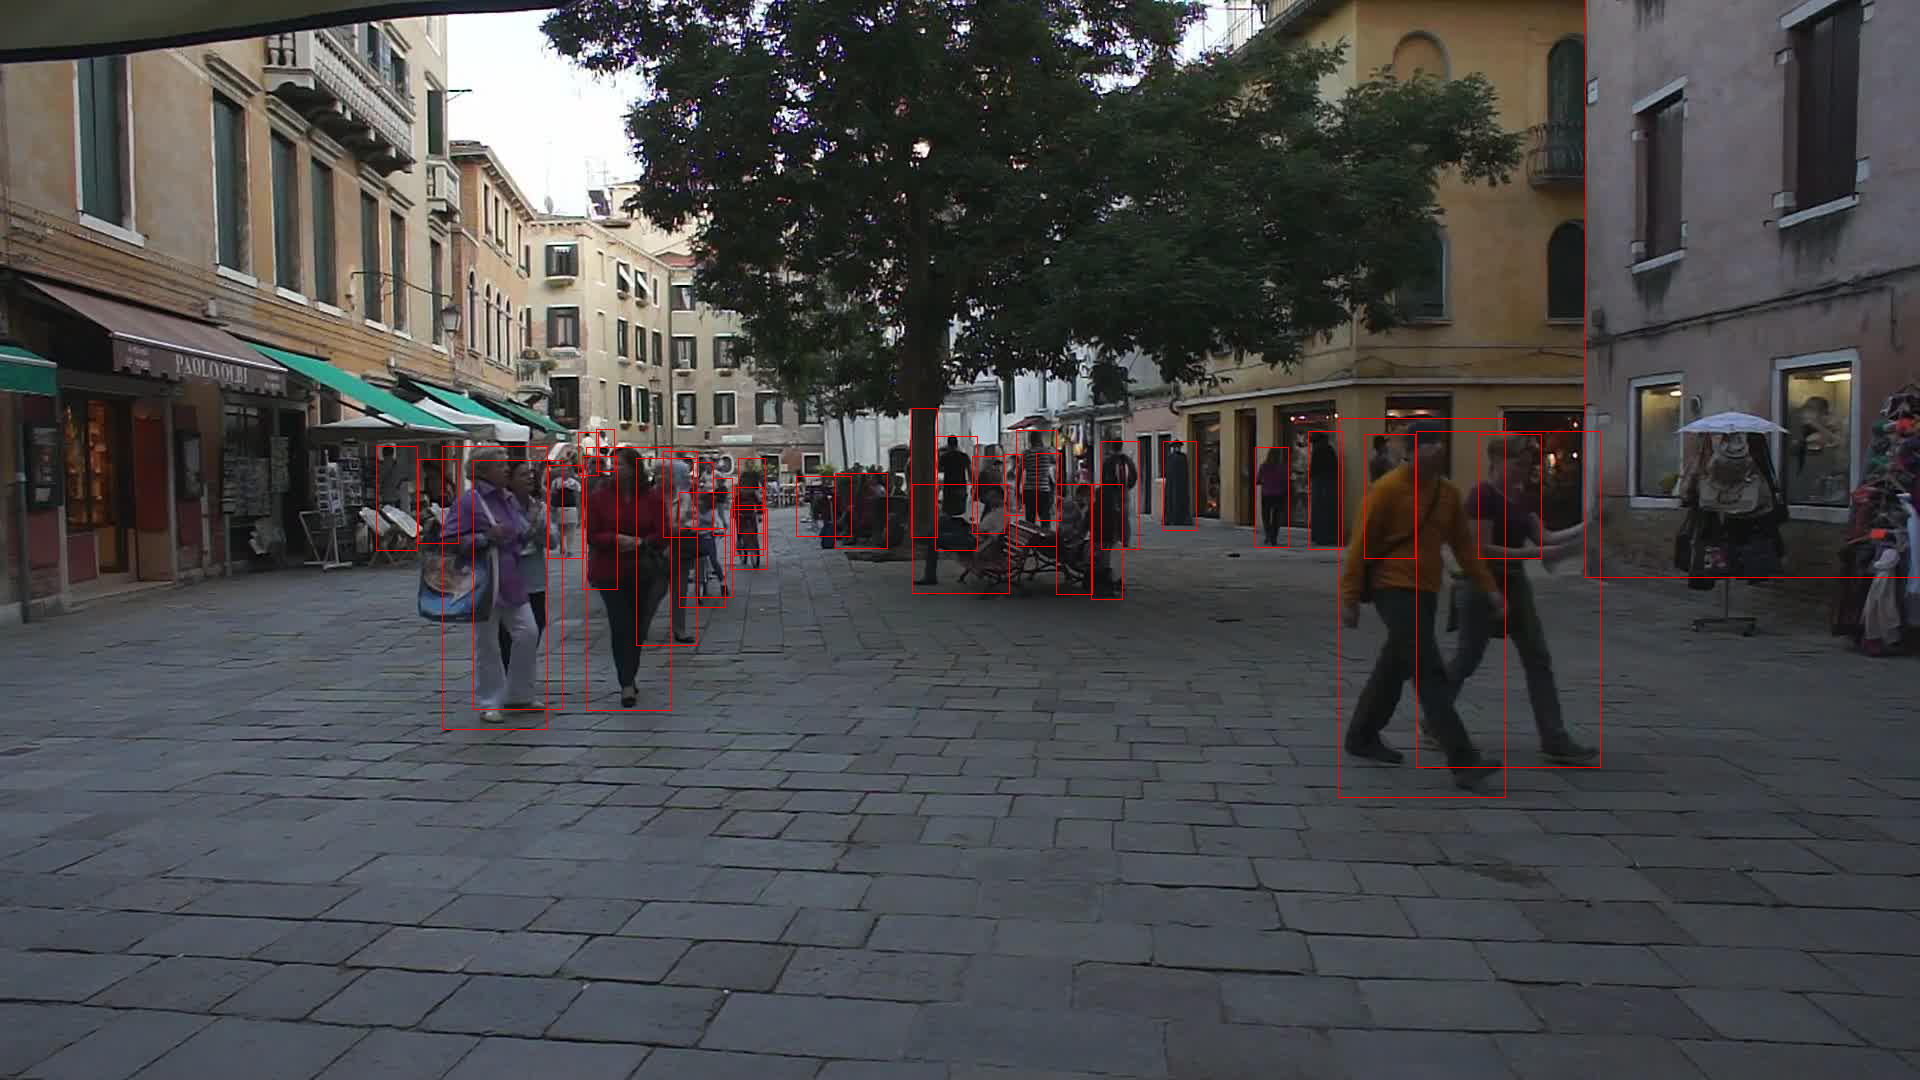

39


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


39


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


39


KeyboardInterrupt: 

In [14]:
for frame in range(1, total_frame+1) :
    ig = Image.open(path.join(image_path, 'img1', '%06d.jpg' % (frame)))
    dr = ImageDraw.Draw(ig)
    for o, value in gt_seqs[frame].items():
        x, y, w, h, *_ = map(float, value)
        dr.rectangle(((x, y), (x+w, y+h)), outline="red")
    for o, value in result_seqs[frame].items():
        x, y, w, h, *_ = map(float, value)
        dr.rectangle(((x, y), (x+w, y+h)), outline="blue")
    display(ig)